## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('Number of rows in the dataset:',df.shape[0])

Number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [4]:
print('Number of unique users in the dataset:',df['user_id'].nunique())

Number of unique users in the dataset: 290584


d. The proportion of users converted.

In [5]:
## List of unique users
unique_ids=list(df['user_id'].unique())
## Proportion of converted and non-converted unique users
df[df['user_id'].isin(unique_ids)]['converted'].value_counts(normalize=True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
## Number of rows that their group doesn't match their landing page
df[np.logical_or(np.logical_and(df['group']=="treatment",df['landing_page']!="new_page"),np.logical_and(df['group']!="treatment",df['landing_page']=="new_page"))].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Droping rows that their group doesn't match their landing page
index_names = df[ ((df['group'] == "treatment") & (df['landing_page'] == 'old_page')) | ((df['group'] == "control") & (df['landing_page'] == 'new_page')) ].index
df2=df.drop(index_names)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
## Number of unique users after dropping the rows that their group doesn't match their landing page
df2['user_id'].nunique()

290584

In [11]:
assert(df['user_id'].nunique()==df2['user_id'].nunique())

- Number of unique rows doen't change after dropping the mismatched rows

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].value_counts().sort_values(ascending=False)[:1]

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.loc[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
## Dropping one of the duplicate rows
df2.drop(1899,inplace=True)
df2.loc[df2['user_id'] == 773192] 

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
## Proportion of converted and non-converted individuals regardless of the page
df2.head(2)
df2.converted.value_counts(normalize=True)

0    0.880403
1    0.119597
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
## Proportion of converted and non-converted individuals in the control group
df2.query('group== "control" ')['converted'].value_counts(normalize=True)

0    0.879614
1    0.120386
Name: converted, dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
## Proportion of converted and non-converted individuals in the experiment(treatment) group
df2.query('group == "treatment" ')['converted'].value_counts(normalize=True)

0    0.881192
1    0.118808
Name: converted, dtype: float64

- The Converion rate of the new page is slightly less than the conversion rate of the old page, but this result is not enough to decide which page is better, we need more advanced statistical analysis to see which page has a higher conversion rate.

d. What is the probability that an individual received the new page?

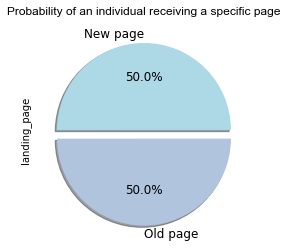

In [18]:
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)

df2['landing_page'].value_counts(normalize=True).plot(kind='pie',labels=['New page','Old page'],
                                                           fontsize=12,autopct='%1.1f%%', shadow = True
                                                           ,colors=my_colors,explode=my_explode)
plt.title('Probability of an individual receiving a specific page',fontname='Arial')
plt.show()

In [19]:
df2['landing_page'].value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

- The two pages have almost equal chances to be received any individual.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the previous results we don't have suffcient evidence to say that the new treatment page leads to more conversions as the old page that was shown to the control group has a conversion rate of 12.03% while the new page that was shown to the treatment group has a conversion rate of 11.88%**

--------

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} <=0 $$
$$H_1: p_{new} - p_{old} >0$$

> The `Null Hypothesis` states that the new page has a lower or even the same conversion rate as the old page.

> The `Alternative Hypothesis` states that the new page has a higher conversion rate than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new=df2.converted.mean()
print('The conversion rate of the new page under the null: {}'.format(p_new))

The conversion rate of the new page under the null: 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old=df2.converted.mean()
print('The conversion rate of the old page under the null: {}'.format(p_old))

The conversion rate of the old page under the null: 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
nnew=df2.query('landing_page=="new_page"').shape[0]
print('Number of individuals in the treatment group: {}'.format(nnew))

Number of individuals in the treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
nold=df2.query('landing_page=="old_page"').shape[0]
print('Number of individuals in the control group: {}'.format(nold))

Number of individuals in the control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted=np.random.binomial(n=1,p=p_new,size=nnew)
new_page_converted.mean()

0.12008808753698988

- Probability of getting 1 = pnew= 0.119597
- Probability of getting 0 = 1-pnew = 0.880403
- This case looks exactly like the loaded dice, and that explains why the average is below 0.5

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted=np.random.binomial(n=1,p=p_old,size=nold)
old_page_converted.mean()
## The mean is smaller than 0.5 as the probability of getting 1 was very low compared to the probability of getting 0

0.1202761677932734

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff=new_page_converted.mean()-old_page_converted.mean()
diff

-0.00018808025628351543

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
new_converted_simulation = np.random.binomial(nnew, p_new, 10000)/nnew
old_converted_simulation = np.random.binomial(nold, p_old, 10000)/nold
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

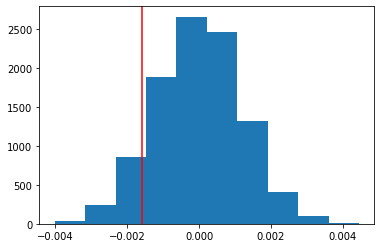

In [46]:
## Actual difference between two pages
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
plt.hist(p_diffs)
plt.axvline(act_diff,color='r')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
p_diffs = np.array(p_diffs)
(p_diffs>act_diff).mean()

0.9024

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We calculated the pvalue, which is the probability of obtaining one extreme value or more in favor of the alternative hypothesis if the null hypothesis is true.** 

**Since the pvalue here is greater than type 1 error which is 0.05 we cannot reject the null hypothesis.**


>Our decision based on the pvalue is not to launch the new page as it won't increase the conversion rate. 

-----

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm
# No of people who recieved the old page
n_old = df2.query('landing_page=="old_page"').shape[0]
# No of people who recieved the new page
n_new = df2.query('landing_page=="new_page"').shape[0]

# No of people who converted given that they recieve the old page
convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
# No of people who converted given that they recieve the new page
convert_new = df2.query('landing_page == "new_page" & converted== 1').shape[0]

In [36]:
print('Number of people who received the old page is {} while number of people who received the new is {}'.format(n_old,n_new))

Number of people who received the old page is 145274 while number of people who received the new is 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_test,p_value=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],value=None, alternative='smaller', prop_var=False)
z_test,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Yes the two values agree with the previous findings that didn't provide an evidence to reject the null hypothesis.**

-----

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**`Logistic Regression`, because the response variable has either 1 or 0 values .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
## Adding the intercept column
df2['intercept']=1
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [53]:
## Creating a dummy variable from the group column
df2[['control','treatment']]=pd.get_dummies(df2['group'])
## Dropping the control group as we can infer it's value from the treatment column
df2.drop('control',axis=1,inplace=True)
## Changing the treatment column to a more representative name
df2.rename(columns={'treatment':'ab_page'},inplace=True)
df2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:06:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.

In [55]:
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Null and Alternative hypotheses associated with the regression model:**

- Null Hypothesis: The difference between conversion rate of the new page and the old page is 0.
- Alternative Hypothesis: The difference between conversion rate of the new page and the old page is not equal 0.

**Difference between the null and alternative hypotheses in Part II and part III:**

- In part II it is one sided t-test, while in part III it is two sided t-test.

**p-value associated with ab_page is 0.190 which states that ab_page (group) variable is not statistically significant, although the p-value in part 2 was higher than that value but both numbers don't provide an evidence to reject the null hyothesis, additonaly the coefficient of ab_page here states that someone who received the new page is 1.015 times to convert like someone who received the old page, both the coefficient of ab_page and the p-value don't lead us to reject the null hypothesis**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Having more explanatory variables can help us better predict the result of the response variable, additional explanatory variables that might influence whether or not individual converts are: gender, nationality, age group, Average time spent on the page.**

**Disadvantages of adding additional explanatory variables(features) are finding these data for too many people, and the complexity of the model that could increase or decrease the weights of the features**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

### Here we want to test the effect of the country which the user lives in and his/her probability of conversion.

In [56]:
## Countries dataframe
df_countries=pd.read_csv('countries.csv')
display(df_countries.shape[0])
df2.shape[0]

290584

290584

In [57]:
## Merging the two data frames on the common column
df_merged=df2.merge(df_countries,on='user_id',how='left')
display(df_merged.head())
display(df_merged.shape[0])
df_merged.country.unique()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


290584

array(['US', 'CA', 'UK'], dtype=object)

In [58]:
## Creating a dummy variable for the countries column
df_merged[['CA','UK','US']]=pd.get_dummies(df_merged['country'])
## I will use USA as a baseline column
logit_mod=sm.Logit(df_merged['converted'],df_merged[['intercept','ab_page','CA','UK']])
results=logit_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        23:06:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.

In [59]:
np.exp(0.0099)

1.0099491671175422

In [60]:
1/np.exp(-0.0408)

1.0416437559600236

### The country which the user lives in doesn't have a clear influence on his/her conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### Here we want to test the way the page variable is related to the probability of conversion for each country.

In [61]:
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_CA'] = df_merged['ab_page'] * df_merged['US']
lm3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK' , 'CA', 'ab_UK', 'ab_CA']])
results = lm3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:               3.482e-05
Time:                        23:07:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_CA          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [62]:
np.exp(0.0783)

1.0814470441230692

In [63]:
np.exp(0.0469)

1.048017202119183

### There is no difference between the way the page variable is related to the probability of conversion for each country.

### Logistic Regression Model Summary

>- Using the group feature to predict the whether an individual will convert or not shows that there is no difference between conversion rate of the new and the old page
>- Adding The country of the user in the model shows that there is no difference in the conversion rate due to the country of the user, taking into consideration that the countries we took are 3 developed countries that seem to have no big difference.
>- For each country the way the page variable is related to the conversion rate is not significant


## Conclusion
> - Using the simple descriptive statistics, we saw no difference in the conversion rate of the old page and the new page.
> - Using A/B Test, there is also no differnce in favor of the new page.
> - Using Logistic Regression, we found that neither the landing_page (old_page, new_page) nor the country of the individual influences the conversion rate.
> - We should not invest in launching a new page as it won't increase the conversion rate.

## Limitation

> - Despite that the main focus was to test whether the new page will enhance the conversion rate or not, it would be useful to have more features that could help better predict whether the individual will convert or not, and using these feature we could use it to increase the converion rate using more variables than the landing page

---